In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Projet 1 : Arrêt optimal

### Mimouni Yassine

## Enoncé

On considère une flotte de N pirogues de pêche au poulpe dans le lagon de Mayotte.  
Toutes les pirogues partent en mer au même moment, chacune peut ramener au maximum un poulpe.  
  
On note $T_i$ le temps nécessaire pour que la pirogue i capture un poulpe.   
On suppose que les $(T_i)$$_{1≤i≤N}$ sont des variables aléatoires indépendantes de même loi exponentielle de paramètre 1.  
  
On s’intéresse au problème d’arrêt suivant :  
Au bout de combien de poulpes péchés est-il optimal de s’arrêter sachant qu’on gagne 1 à chaque fois qu’on attrape un poulpe
et qu’on paye c ≥ 0 fois le temps total requis ?

## Définition des variables

On note :  
$$T_{(0)} = 0 < T_{(1)} < ... < T_{(n)}$$  
le réarrangement croissant des durées de pêche au poulpe, et  
$$S_0 = 0\text,\quad S_i = T_{(i)} − T_{(i−1)}\quad\text pour\quad1 \le i \le N\text,$$  
les temps entre les instants successifs de pêche.  
  
On pose $\mathcal{F}_0 = \{∅, Ω\}$ et $\mathcal{F}_i = σ(S_0,...,S_i)$ pour $1 \le i \le N$, la filtration des observations.  
  
Le processus de gain est : $X_n = n − cT_{(n)}$.

## Partie 1 : Modélisation

### Question 1)

On pose : $T = (T_{1},..,T_{N})$ un vecteur aléatoire.  
Soit $t = (t_1,...,t_N)$ un vecteur de $\mathbb{R}^N$.  
  
Les $T_{(i)}$ sont indépendants pour tout $0 \le n \le N$ et de même loi exponentielle de paramètre 1.  
  
On en déduit la densité du vecteur T :  
\begin{align}
f_T(t) & = f_{T_{(1)},..,T_{(N)}}(t_1,...,t_N)\\
& = f_{T_{1}}(t_1)...f_{T_{N}}(t_N)\\
& = \exp(-\sum_{i=1}^N t_i) \mathbb{1}_{(0 \le t_1 \le ... \le t_N)}\end{align}

### Question 2)

On utilise un résultat lié à la loi de Laplace.  
  
**Théorème :**  
Soient $X_1$ et $X_2$ deux variables aléatoires indépendantes suivant une loi exponentielle de paramètre $\lambda_1$ et $\lambda_2$ respectivement.  
Alors, $\lambda_1X_1 - \lambda_2X_2$ suit une loi de Laplace de paramètres (0,1).  
  
Comme $S_i = T_{(i)} - T_{(i-1)}$ avec les $T_{(i)}$ indépendants et de même loi exponentielle de paramètre 1, on en déduit que $S_i$ suit une loi de Laplace de paramètre (0,1).

### Question 3)

On remarque que $T_{(N)} = \sum_{i=0}^N S_i$.  

D'où, $X_n = n - cT_{(N)} = n - \sum_{i=0}^N S_i$.  
Or, n est $\mathcal{F}_n$-mesurable $\forall n \in \mathbb{N}$ et $S_n$ a pour filtration naturelle $(\mathcal{F}_n)$$_{n \in \mathbb{N}}$.  
Donc $(X_n)$$_{n \in \mathbb{N}}$ est adaptée à la filtration $(\mathcal{F}_n)$$_{n \in \mathbb{N}}$.  
  
  
On montre maintenant que $(X_n)$$_n$ est intégrable $\forall n \in 0 \le n \le N$.  
\begin{align}
\mathbb{E}[\lvert X_n \rvert] & = \mathbb{E}[\lvert n - cT_{(n)} \rvert]\\
& \leq  \mathbb{E}[\lvert n + cT_{(n)} \rvert]\\
& \leq n + c\mathbb{E}[\lvert T_{(n)} \rvert]\\
& = n + c\\
& \le N + c\\
& < \infty\end{align}  
  
Donc $(X_n)$$_n$ est bien intégrable $\forall n \in 0 \le n \le N$.

## Partie 2 : Etude numérique

### Question 4)

In [7]:
def gain(N,c):
    
    """Fonction prenant en entrée le nombre N de pirogue et le coût c du temps de pêche
       Donne la suite des gains X en sortie"""
    
    T = np.random.exponential(1,N+1) # liste de N+1 réalisations d'une loi exponentielle de paramètre 1
    T_tri = np.sort(T) # liste T dont les éléments sont triés dans l'ordre croissant
    T_tri[0] = 0 
    
    X = np.zeros(N+1)
    
    for i in range(N+1):
        X[i] = i - c*T_tri[i]
        
    return X

### Question 5)

In [8]:
N = 10
c = 3
X = gain(N,c)

Trajectoires de $X_n$

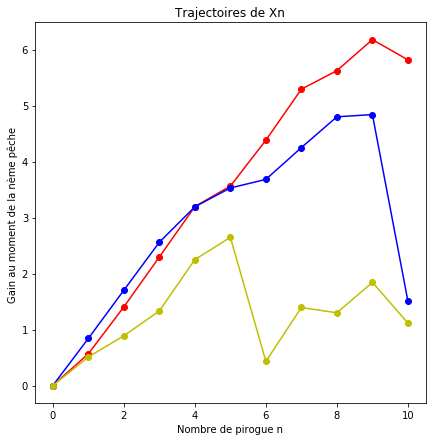

In [9]:
n = np.linspace(0,N,N+1)

fig = plt.figure(1,figsize=(7,7))

# On trace 3 trajectoires
plt.plot(n,gain(N,c),"-ro") 
plt.plot(n,gain(N,c),"-bo")
plt.plot(n,gain(N,c),"-yo")

plt.title('Trajectoires de Xn')
plt.xlabel('Nombre de pirogue n')
plt.ylabel('Gain au moment de la nème pêche ')
plt.show()


### Question 6)

Implémentation de la stratégie 1

In [10]:
def gain_strat1(N,c):
    
    """Application de la stratégie 1
       On s'arrête quand la moitié des pirogues a pêché un poulpe"""
    
    T = np.random.exponential(1,N+1) # liste de N+1 réalisations d'une loi exponentielle de paramètre 1
    T_tri = np.sort(T) # liste T dont les éléments sont triés dans l'ordre croissant
    T_tri[0] = 0 
    
    X = np.zeros(N+1)
    
    for i in range(int(np.ceil((N+1)/2))):
        X[i] = i - c*T_tri[i]
    
    return X

Trajectoires de $X_n$ avec la stratégie 1

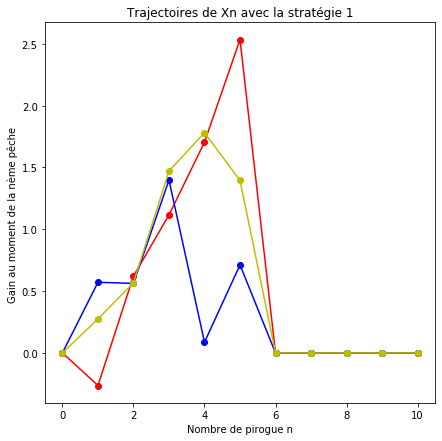

In [11]:
n = np.linspace(0,N,N+1)
N = 10

fig = plt.figure(1,figsize=(7,7))

# On trace 3 trajectoires
plt.plot(n,gain_strat1(N,c),"-ro") 
plt.plot(n,gain_strat1(N,c),"-bo")
plt.plot(n,gain_strat1(N,c),"-yo")

plt.title('Trajectoires de Xn avec la stratégie 1')
plt.xlabel('Nombre de pirogue n')
plt.ylabel('Gain au moment de la nème pêche ')
plt.show()

Implémentation de la stratégie 2

In [12]:
def gain_strat2(N,c):
    
    """Application de la stratégie 2
       On s'arrête dès que gain dépasse le coût"""
    
    T = np.random.exponential(1,N+1) # liste de N+1 réalisations d'une loi exponentielle de paramètre 1
    T_tri = np.sort(T) # liste T dont les éléments sont triés dans l'ordre croissant
    T_tri[0] = 0 
    
    X = np.zeros(N+1)
    i=0
    
    while (i<N+1 and i - c*T_tri[i]<c):
        X[i] = i - c*T_tri[i]
        i = i+1

    return X
    

Trajectoires de $X_n$ avec la stratégie 2

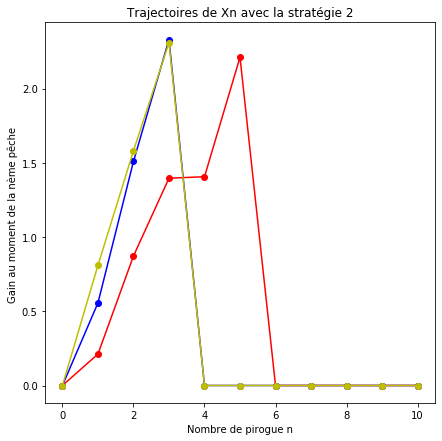

In [13]:
n = np.linspace(0,N,N+1)
N = 10

fig = plt.figure(1,figsize=(7,7))

# On trace 3 trajectoires
plt.plot(n,gain_strat2(N,c),"-ro") 
plt.plot(n,gain_strat2(N,c),"-bo")
plt.plot(n,gain_strat2(N,c),"-yo")

plt.title('Trajectoires de Xn avec la stratégie 2')
plt.xlabel('Nombre de pirogue n')
plt.ylabel('Gain au moment de la nème pêche ')
plt.show()

### Méthode de Monte Carlo

In [14]:
def monte_carlo(X):
    
    num = 0
    den = 1
    
    for i in range(len(X)):
        num = num + X[i]
        if X[i] != 0:
            den = den + 1
     
    return num/den

On compare maintenant les deux stratégies.

In [15]:
def compar_strat(N,c):
    
    cpt = 0
    
    for i in range(N+1):
        if monte_carlo(gain_strat1(N,c)) > monte_carlo(gain_strat2(N,c)):
            cpt = cpt + 1
       
    pourcentage = (cpt*100)/(N+1)
    
    return "".join("La stratégie 1 est meilleure que la stratégie 2 dans " + str(pourcentage) + "% " + " des cas.")

In [16]:
for i in range(10):
    print (compar_strat(N=10, c=3))

La stratégie 1 est meilleure que la stratégie 2 dans 63.63636363636363%  des cas.
La stratégie 1 est meilleure que la stratégie 2 dans 72.72727272727273%  des cas.
La stratégie 1 est meilleure que la stratégie 2 dans 81.81818181818181%  des cas.
La stratégie 1 est meilleure que la stratégie 2 dans 54.54545454545455%  des cas.
La stratégie 1 est meilleure que la stratégie 2 dans 72.72727272727273%  des cas.
La stratégie 1 est meilleure que la stratégie 2 dans 36.36363636363637%  des cas.
La stratégie 1 est meilleure que la stratégie 2 dans 63.63636363636363%  des cas.
La stratégie 1 est meilleure que la stratégie 2 dans 90.9090909090909%  des cas.
La stratégie 1 est meilleure que la stratégie 2 dans 72.72727272727273%  des cas.
La stratégie 1 est meilleure que la stratégie 2 dans 63.63636363636363%  des cas.


On déduit de ces observations que la stratégie 1 est la plus efficace.

## Partie 3 : Etude théorique

### Question 8)

En appliquant les résultats de base sur l'espérance conditionnelle et les expressions vues précedemment on obtient :  
  
\begin{align}
\mathbb{E}[X_{n+1} \rvert \mathcal{F}_n] & = \mathbb{E}[n+1 - cT_{(n+1)} \rvert \mathcal{F}_n ]\\
& = n+1 - c \mathbb{E}[T_{(n+1)} \rvert \mathcal{F}_n] \\
& = n+1 - c \mathbb{E}[\sum_{i=0}^{n+1} S_i \rvert \mathcal{F}_n]\\
& = n+1 - c \mathbb{E}[S_{n+1} + \sum_{i=0}^n S_i \rvert \mathcal{F}_n] \\
& = n+1 - c (T_{(n)} + \mathbb{E}[S_{n+1}] ) \\
& = n - cT_{(n)} + 1 - c( N - (n+1) + 1 )^{-1}\\
& = X_n + 1 - c( N - n )^{-1}\end{align}

### Question 9)

$$u_n = 1 - c(N-n)^{-1}$$

### Question 10)

In [17]:
def u_n(N,c):
    u = np.zeros(N+1)
    
    for i in range(N+1):
        u[i] = 1 - c*(N-i)^(-1)
        
    return u

In [18]:
u_n(10,3)

array([28., 25., 22., 19., 16., 13., 10.,  7.,  4.,  1., -2.])

### Question 11)

\begin{align}
u_n & \geq 0\\
\iff  1 - c(N-n)^{-1} & \geq 0\\
\iff  1 & \geq c(N-n)^{-1}\\
\iff  (N - n) & \geq c\end{align}